<a href="https://colab.research.google.com/github/duncantanner/Assignments/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/DS3001/visualization


Cloning into 'visualization'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 34 (delta 4), reused 1 (delta 1), pack-reused 23
Receiving objects: 100% (34/34), 7.18 MiB | 7.42 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./visualization/assignment/data/college_completion.csv')
print('Question 1:', '\n')
print(df.shape, '\n')
print(df.head(), '\n')

Question 1: 

(3798, 63) 

   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  Na

In [4]:
print(pd.crosstab(df['control'], df['level']), '\n')
print(pd.crosstab(df['control'], df['level'], normalize = 'all'), '\n')

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632 

level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403 



The largest percent of colleges are private not-for-profit 4 year colleges. The smallest percent of colleges are private for-profit 2 year colleges. The majority of all colleges are 4 year colleges.

<Axes: xlabel='grad_100_value', ylabel='Count'>

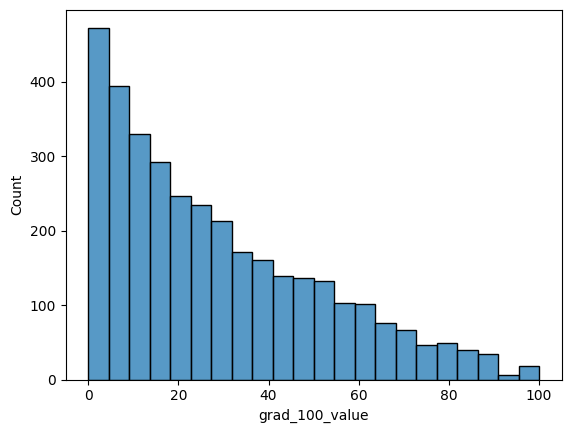

In [5]:
import seaborn as sns
sns.histplot(df['grad_100_value'])

<Axes: xlabel='grad_100_value', ylabel='Density'>

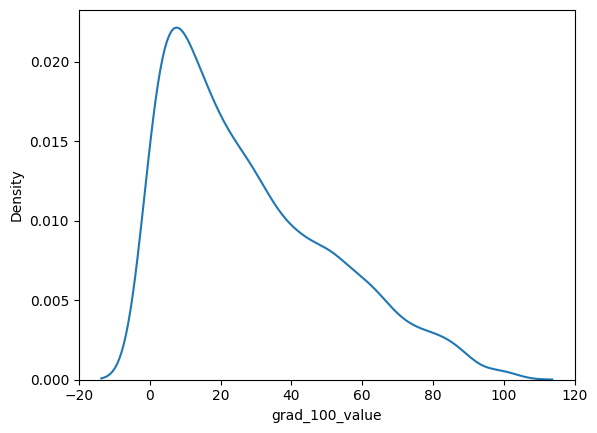

In [6]:
sns.kdeplot(df['grad_100_value'])


<Axes: ylabel='grad_100_value'>

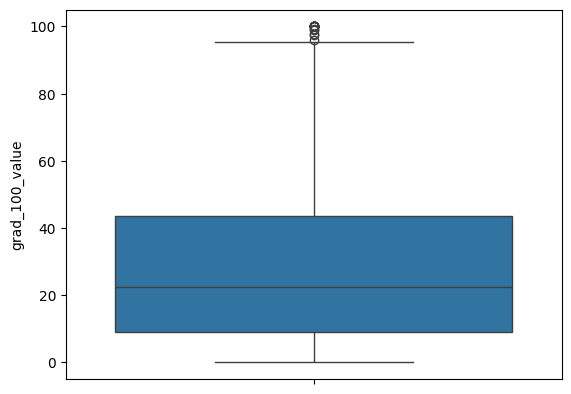

In [7]:
sns.boxplot(df['grad_100_value'])


In [8]:
df['grad_100_value'].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

<Axes: xlabel='grad_100_value', ylabel='Density'>

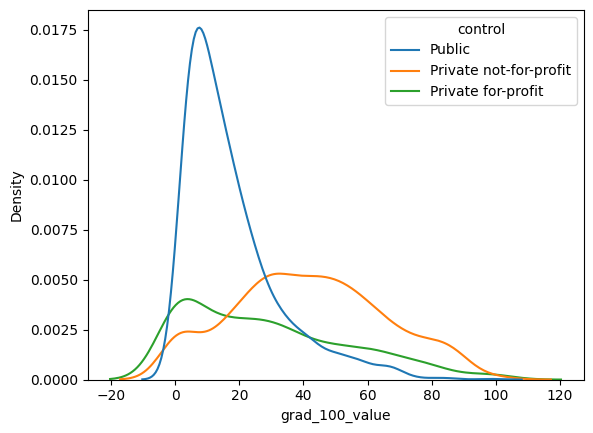

In [9]:
sns.kdeplot(data=df, x='grad_100_value', hue='control')

<Axes: xlabel='grad_100_value', ylabel='Density'>

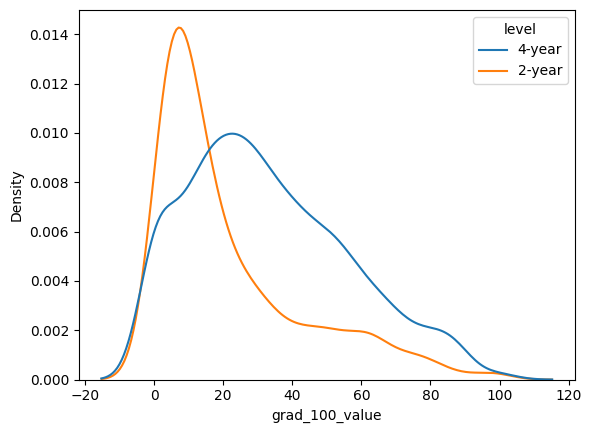

In [10]:
sns.kdeplot(data=df,x='grad_100_value',hue='level')

In [11]:
df.loc[:,['control','grad_100_value']].groupby('control').describe()

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

In [12]:
df.loc[:,['level','grad_100_value']].groupby('level').describe()

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

Graduation rates are higher for 4-year colleges than for 2-year colleges, and they are higher for private not-for-profit.

<Axes: xlabel='grad_100_value', ylabel='Density'>

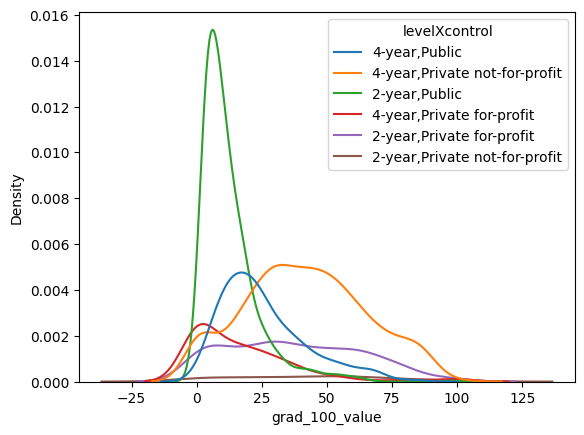

In [13]:
df['levelXcontrol']=df['level']+','+df['control']
sns.kdeplot(data=df,x='grad_100_value',hue='levelXcontrol')

In [14]:
df.loc[:,['level','control','grad_100_value']].groupby(['level','control']).describe()

grad_100_value                             \
                                       count       mean        std  min   
level  control                                                            
2-year Private for-profit              461.0  37.197614  25.497380  0.0   
       Private not-for-profit           68.0  41.913235  28.348302  0.0   
       Public                          926.0  12.400000  10.893600  0.0   
4-year Private for-profit              318.0  17.382704  20.788525  0.0   
       Private not-for-profit         1121.0  41.645674  23.243453  0.0   
       Public                          573.0  25.561082  16.403902  0.0   

                                                            
                                  25%   50%     75%    max  
level  control                                              
2-year Private for-profit      15.800  33.9  57.800  100.0  
       Private not-for-profit  16.225  44.4  61.200  100.0  
       Public                   5.100   9.4  16.175   97.8  
4-year Private for-profit       0.000  12.5  26.325  100.0  
       Private not-for-profit  25.000  41.0  57.800  100.0  
       Public                  13.600  21.8  33.800   86.3

It appears the private not-for-profit have consistently higher graduation rates across 2-year and 4-year programs.

<Axes: xlabel='aid_value', ylabel='Density'>

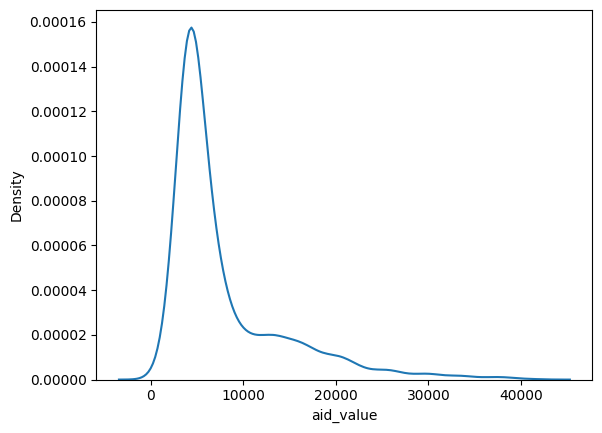

In [15]:
sns.kdeplot(data=df, x = "aid_value")

<Axes: xlabel='aid_value', ylabel='Density'>

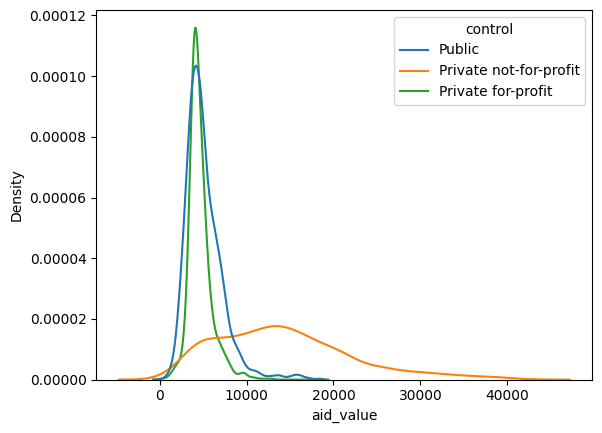

In [16]:
sns.kdeplot(data=df, x='aid_value',hue='control')

In [17]:
df.loc[:,['control','aid_value']].groupby('control').describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

In [18]:
df.loc[:,['level','aid_value']].groupby('level').describe()


aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

The graph shows that private NFP gives a lot more aid than for profit institutions (ignoring the level variable).

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

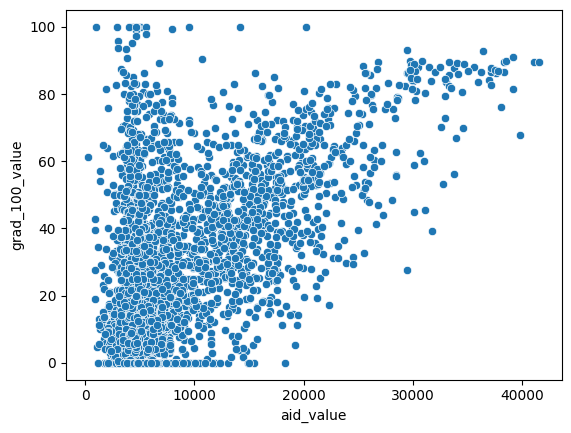

In [19]:
sns.scatterplot(data=df, x='aid_value', y='grad_100_value')

There is a positive correlation between aid value and grad rate for one group of points, but a lack of correlation for another group.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

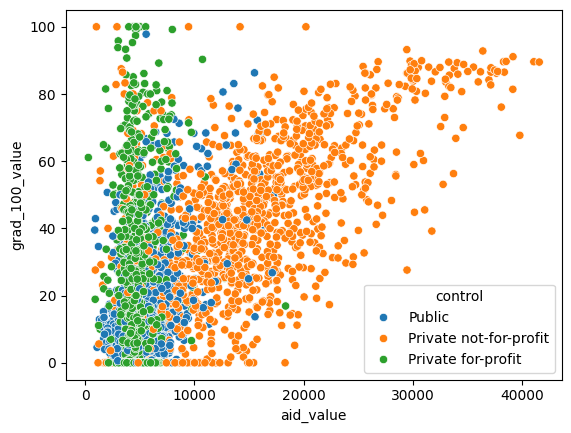

In [20]:
sns.scatterplot(data=df,x='aid_value', y='grad_100_value', hue='control')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

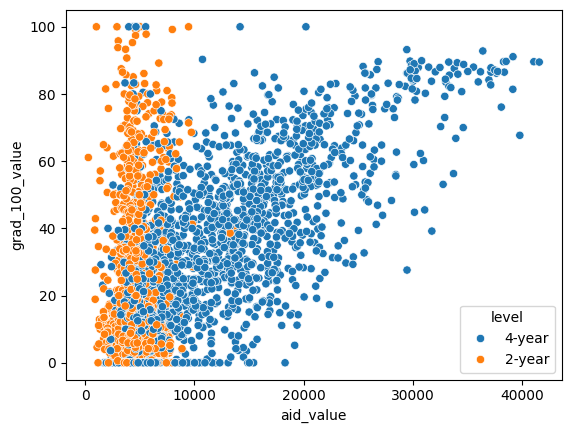

In [21]:
sns.scatterplot(data=df,x='aid_value', y='grad_100_value', hue='level')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

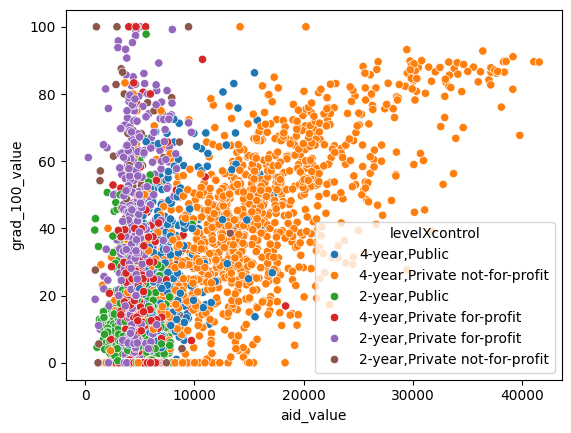

In [22]:
sns.scatterplot(data=df,x='aid_value', y='grad_100_value', hue='levelXcontrol')

The correlation between aid and graduation exists only for 4-year private NFP institutions.Other institutions give low aid, so a correlation is hard to observe.

Question 4:
  1. I imported the Rural Health Clinic Enrollment Data.
  2. The data dictionary itself does not address how missings are handled. In the additional resources, the data guidance document mentions "if applicable, the files may omit a small number of enrollments with PECOS data quality issues such as missing critical enrollment information." The dictionary lists a few restrictions to the data, but in my opinion, it is not complete.
  3. I picked ENROLLMENT STATE and ORGANIZATION NAME because I find the two jointly interesting - which states have the most rural health clinic enrollmetns, and which company's provide for these people in these states the most.

In [46]:
print("3.",'\n')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('./RHC_Enrollments_2024.01.05.csv', encoding='latin1')
df.head()


3. 



,ENROLLMENT ID,ENROLLMENT STATE,PROVIDER TYPE CODE,PROVIDER TYPE TEXT,NPI,MULTIPLE NPI FLAG,CCN,ASSOCIATE ID,ORGANIZATION NAME,DOING BUSINESS AS NAME,INCORPORATION DATE,INCORPORATION STATE,ORGANIZATION TYPE STRUCTURE,ORGANIZATION OTHER TYPE TEXT,PROPRIETARY_NONPROFIT,ADDRESS LINE 1,ADDRESS LINE 2,CITY,STATE,ZIP CODE
0,O20020731000000,WA,00-17,PART A PROVIDER - RURAL HEALTH CLINIC,1508861386,N,503883,941117907,PALOUSE HEALTH CENTER PS,PALOUSE HEALTH CENTER,03/21/2000,WA,CORPORATION,NaN,P,235 E MAIN ST,NaN,PALOUSE,WA,99161
1,O20020813000023,ND,00-17,PART A PROVIDER - RURAL HEALTH CLINIC,1497856025,N,353982,42127045,WEST RIVER HEALTH SERVICES,BOWMAN CLINIC,01/06/1977,ND,CORPORATION,NaN,N,608 HIGHWAY 12 WEST,NaN,BOWMAN,ND,586234507
2,O20020813000025,ND,00-17,PART A PROVIDER - RURAL HEALTH CLINIC,1760570394,N,353983,42127045,WEST RIVER HEALTH SERVICES,WEST RIVER HEALTH CLINIC - SCRANTON,NaN,NaN,CORPORATION,NaN,N,211 S MAIN ST,NaN,SCRANTON,ND,58653
3,O20020814000001,SD,00-17,PART A PROVIDER - RURAL HEALTH CLINIC,1801987904,N,433987,42127045,WEST RIVER HEALTH SERVICES,NaN,11/30/1998,ND,CORPORATION,NaN,N,411 MAIN AVE,NaN,LEMMON,SD,576381420
4,O20020814000004,ND,00-17,PART A PROVIDER - RURAL HEALTH CLINIC,1831286160,N,353981,42127045,WEST RIVER HEALTH SERVICES,NEW ENGLAND CLINIC,01/26/1977,ND,CORPORATION,NaN,N,820 2ND AVE W,NaN,NEW ENGLAND,ND,586477017


In [56]:
df = pd.read_csv('./RHC_Enrollments_2024.01.05.csv', encoding='latin1')
df['ENROLLMENT STATE'].value_counts()

ENROLLMENT STATE
KY    370
TX    348
MO    325
TN    272
IL    263
CA    255
MS    227
LA    220
MI    217
IA    215
KS    180
FL    145
WI    141
AL    139
AR    137
OK    129
NE    128
WA    117
IN    114
OR    113
SC    102
MN     99
GA     90
NC     72
PA     67
WV     66
VA     63
OH     63
MT     62
ND     60
SD     57
NY     55
CO     55
ID     49
AZ     49
ME     34
WY     28
HI     20
NM     19
NV     18
UT     17
NH     16
VT     10
MA      7
MD      1
RI      1
Name: count, dtype: int64

In [57]:
df['ORGANIZATION NAME'].value_counts()

ORGANIZATION NAME
FAST PACE MEDICAL CLINIC PLLC              73
REEDLEY COMMUNITY HOSPITAL                 36
ACCESS MEDICAL CLINIC ARKANSAS LLC         27
WILLIAMS MEDICAL GROUP PRACTICE LLC        26
FAST PACE MISSISSIPPI PLLC                 25
                                           ..
EL DORADO CLINIC, P.A.                      1
GREEN VALLEY MEDICAL CORPORATION            1
LENTZ PEDIATRICS, PLC                       1
CAPE GIRARDEAU COUNTY HEALTH DEPARTMENT     1
IZARD REGIONAL HOSPITAL LLC                 1
Name: count, Length: 2447, dtype: int64

In [58]:
e_missing_values = df['ENROLLMENT STATE'].isnull().sum()
df['ENROLLMENT STATE'].fillna('Unknown', inplace=True) # replaces missing values with unknown
print("Missing values in ENROLLMENT STATE:", e_missing_values)

Missing values in ENROLLMENT STATE: 0


In [59]:
o_missing_values = df['ORGANIZATION NAME'].isnull().sum()
df['ORGANIZATION NAME'].fillna('Unknown', inplace=True) # replaces missing values with unknown
print("Missing values in ORGANIZATION NAME:", o_missing_values)

Missing values in ORGANIZATION NAME: 0


<Axes: xlabel='ENROLLMENT STATE', ylabel='count'>

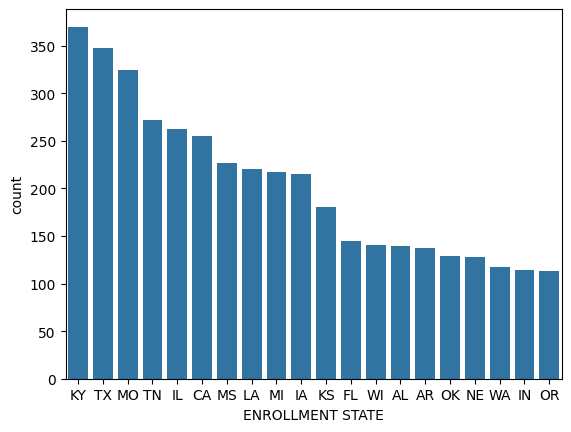

In [103]:
sns.barplot(df['ENROLLMENT STATE'].value_counts().head(20))
##printed only top 20 states with most enrollment due to size of variable

ORGANIZATION NAME
FAST PACE MEDICAL CLINIC PLLC           73
REEDLEY COMMUNITY HOSPITAL              36
ACCESS MEDICAL CLINIC ARKANSAS LLC      27
WILLIAMS MEDICAL GROUP PRACTICE LLC     26
FAST PACE MISSISSIPPI PLLC              25
MCLAREN CENTRAL MICHIGAN                24
BOA VIDA HOSPITAL OF ABERDEEN MS LLC    21
BAPTIST HEALTH MEDICAL GROUP INC        20
FAST PACE KENTUCKY PLLC                 19
WEST FLORIDA MEDICAL ASSOCIATES P A     17
Name: count, dtype: int64


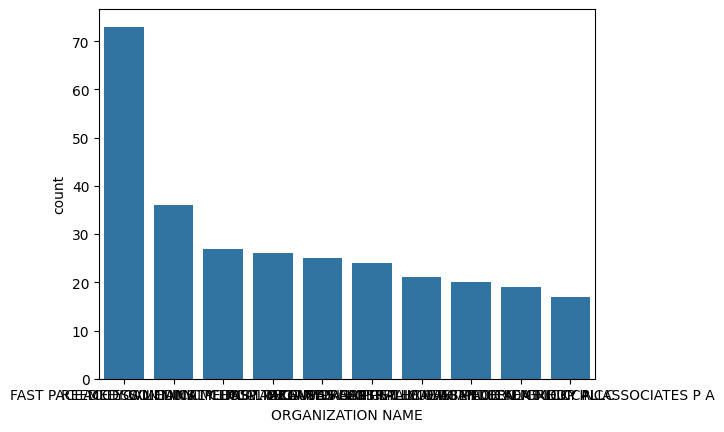

In [108]:
sns.barplot(df['ORGANIZATION NAME'].value_counts().head(10))
print(df['ORGANIZATION NAME'].value_counts().head(10))
##printed top 10 for same reason, printed head to make easier to read

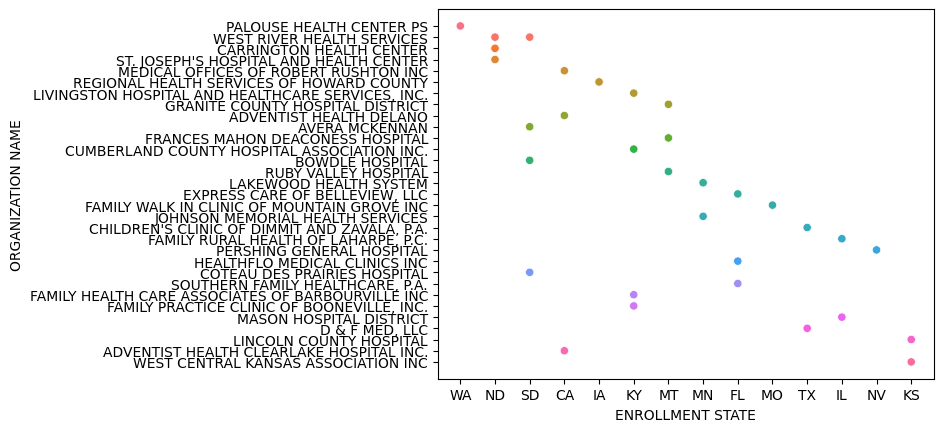

In [119]:
sns.scatterplot(data=df, x=df['ENROLLMENT STATE'], y=df['ORGANIZATION NAME'].head(40), hue=df['ORGANIZATION NAME'].head(40))
plt.legend([],[], frameon=False)
#shows what states the top 40 organizations provide for

In [126]:
cross_tab = pd.crosstab(df['ENROLLMENT STATE'], df['ORGANIZATION NAME'].head(10))
print(cross_tab)

ORGANIZATION NAME  CARRINGTON HEALTH CENTER  \
ENROLLMENT STATE                              
CA                                        0   
IA                                        0   
ND                                        2   
SD                                        0   
WA                                        0   

ORGANIZATION NAME  MEDICAL OFFICES OF ROBERT RUSHTON INC  \
ENROLLMENT STATE                                           
CA                                                     1   
IA                                                     0   
ND                                                     0   
SD                                                     0   
WA                                                     0   

ORGANIZATION NAME  PALOUSE HEALTH CENTER PS  \
ENROLLMENT STATE                              
CA                                        0   
IA                                        0   
ND                                        0   
SD            

Because of the breadth of the data, it is hard to distiguish much from the scatter plot and cross tabulation. What we can determine clearly though, is that Kentucky has the most Rural Health Clinic Enrollers, and FAST PACE MEDICAL CLINIC PLLC provides more for rural areas than any other agency.